# **Predict price house - Linear Regression**

## **1. General**

## **2. Libraries and Environment**

In [482]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [483]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [484]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
np.random.seed(42)

## **3. Data loading and Quick glance**

In [486]:
houses = pd.read_csv('./data/data.csv')

In [487]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [488]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [489]:
houses = houses.drop(columns=['street', 'city', 'statezip', 'country', 'date', 'sqft_lot', 'sqft_basement', 'yr_built', 'yr_renovated', 'condition', 'waterfront', 'view'])

## **4. Visualization**

In [490]:
houses = houses[houses['price'].between(100000, 700000)]
houses = houses[houses['bedrooms'].between(1, 5)]
houses = houses[houses['bathrooms'].between(1, 3)]
houses = houses[houses['sqft_living'].between(1, 4000)]

In [491]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above
count,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000
mean,411021.266761,3.219906,1.932472,1809.141221,1.434234,1567.465062
std,141164.920569,0.793196,0.601874,616.132481,0.530223,601.018898
min,100000.000000,1.000000,1.000000,520.000000,1.000000,520.000000
25%,299000.000000,3.000000,1.500000,1330.000000,1.000000,1120.000000
50%,402500.000000,3.000000,2.000000,1760.000000,1.000000,1410.000000
75%,525000.000000,4.000000,2.500000,2210.000000,2.000000,1910.000000
max,700000.000000,5.000000,3.000000,3990.000000,3.500000,3910.000000


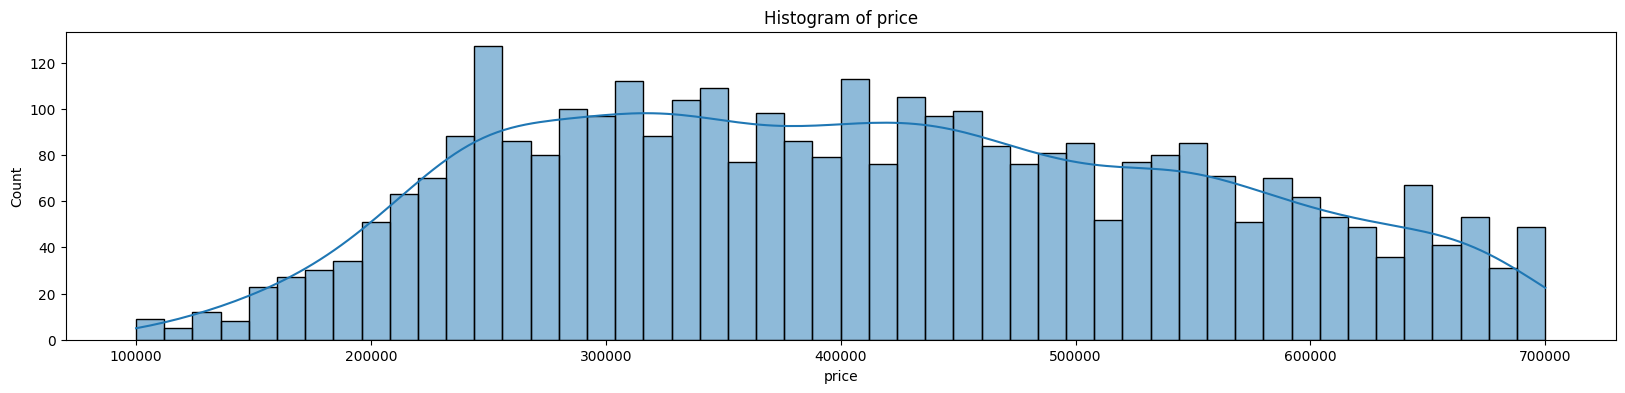

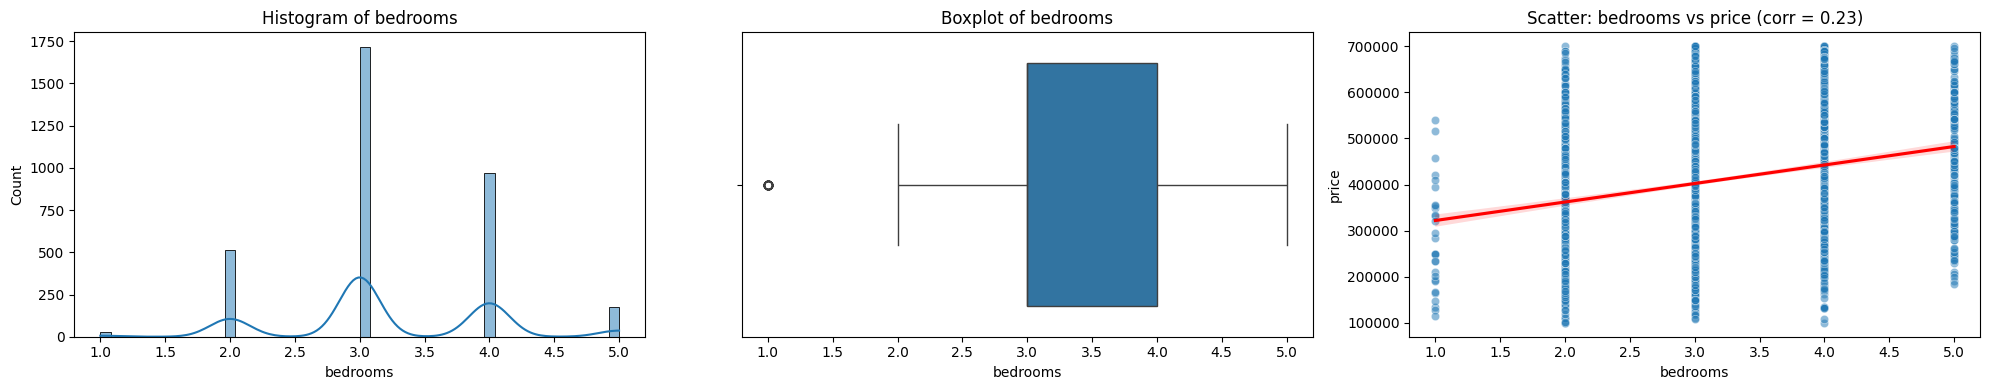

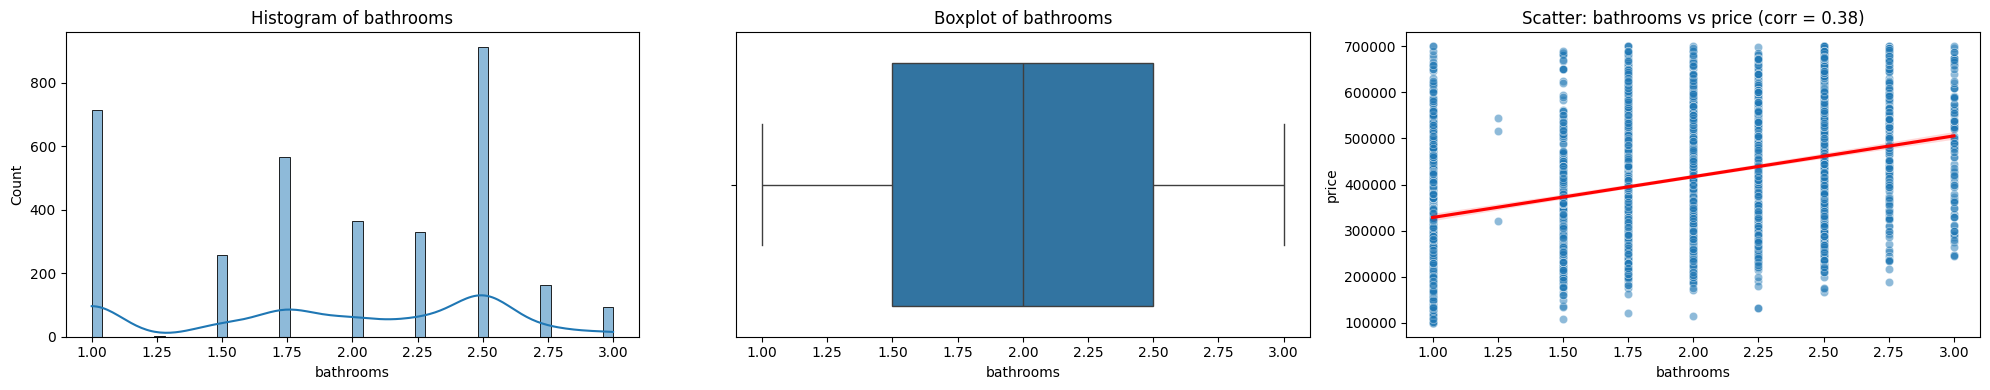

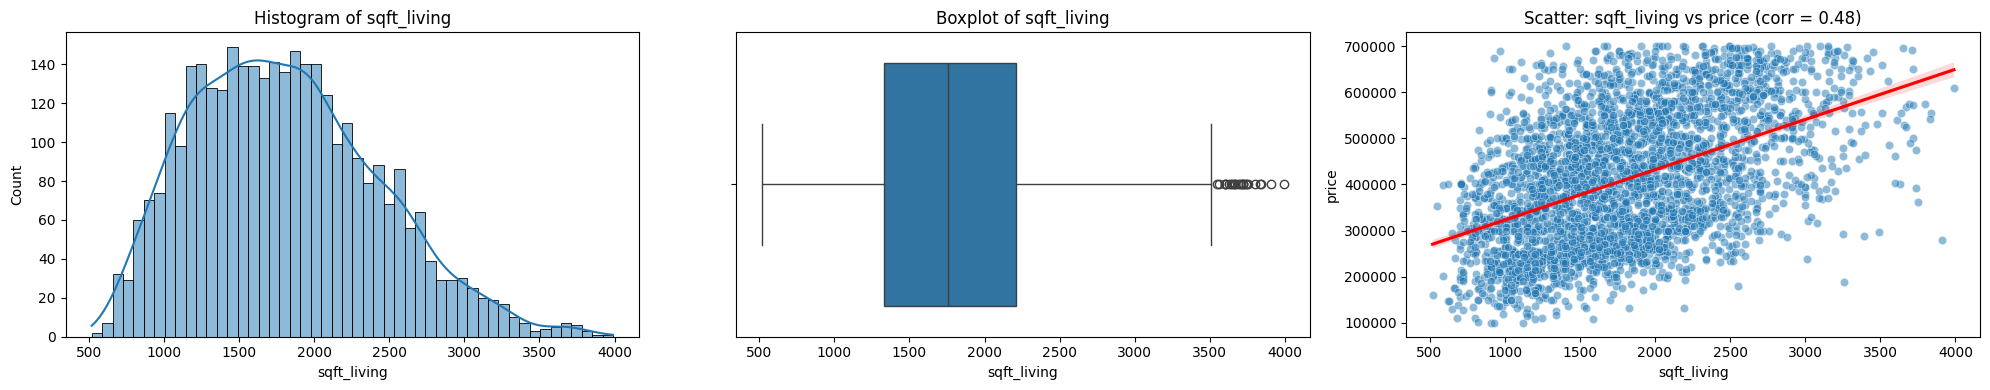

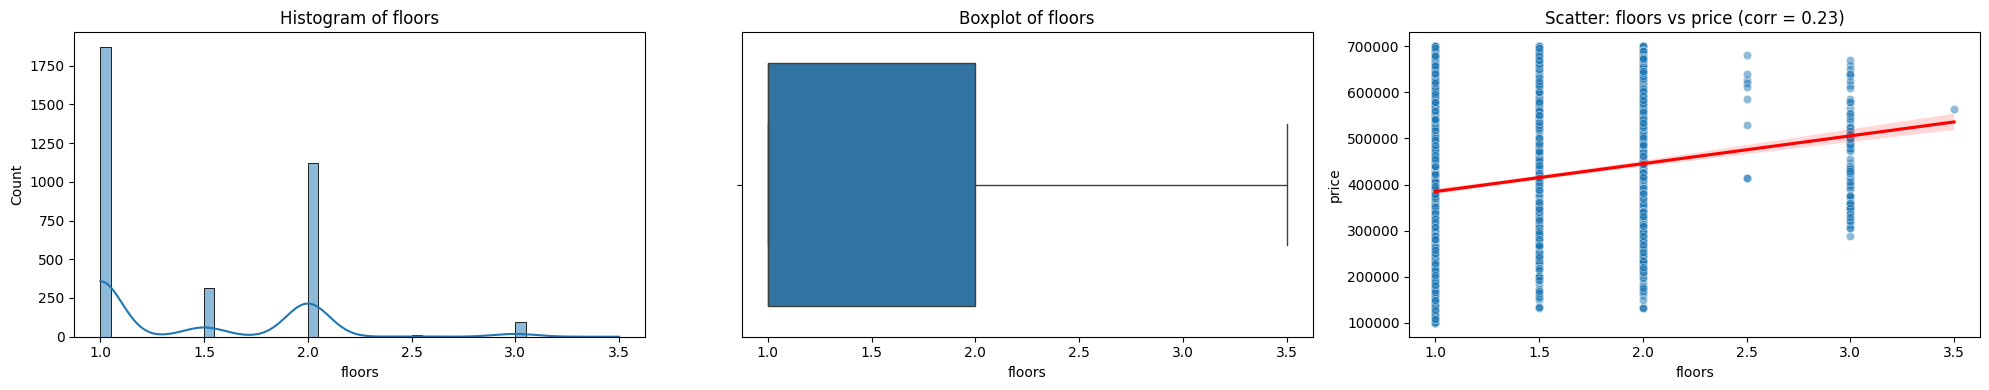

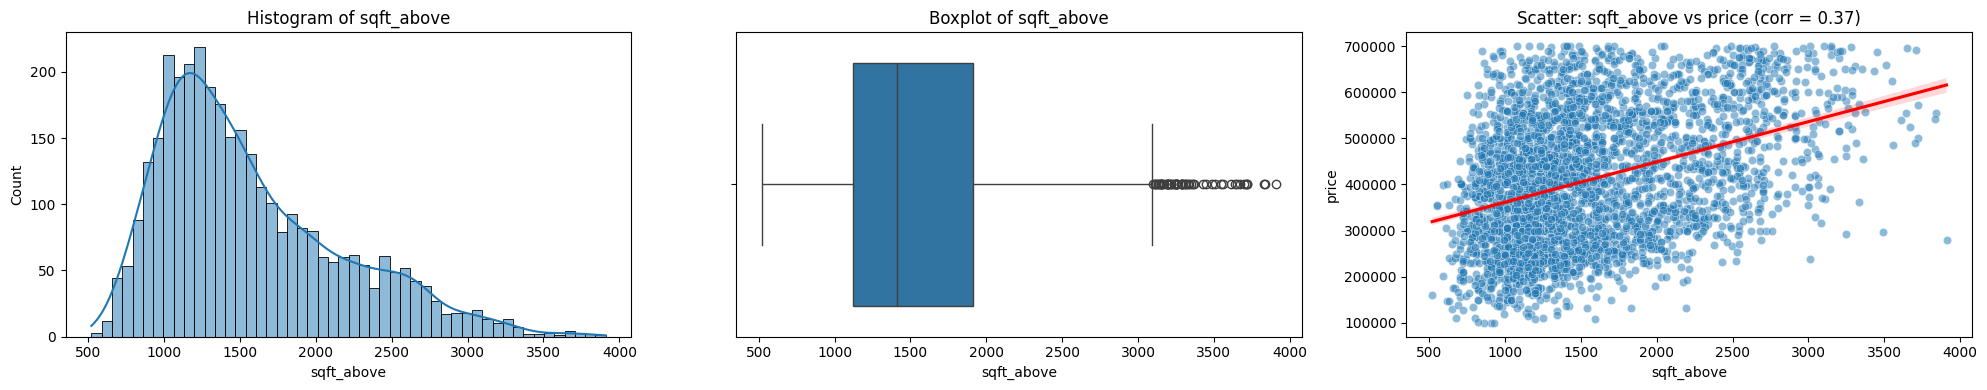

In [492]:
for f in houses.columns:
    if f != 'price':
        plt.figure(figsize=(20, 4))

        plt.subplot(1, 3, 1)
        sns.histplot(houses[f], kde=True, bins=50)
        plt.title(f"Histogram of {f}")

        plt.subplot(1, 3, 2)
        sns.boxplot(x=houses[f])
        plt.title(f"Boxplot of {f}")

        plt.subplot(1, 3, 3)
        sns.scatterplot(x=houses[f], y=houses['price'], alpha=0.5)
        sns.regplot(x=houses[f], y=houses['price'], scatter=False, color="red")

        corr = houses[[f, 'price']].corr().iloc[0,1]
        plt.title(f"Scatter: {f} vs price (corr = {corr:.2f})")

        plt.tight_layout()

    else:
        plt.figure(figsize=(20, 4))
        plt.subplot(1, 1, 1)
        sns.histplot(houses[f], kde=True, bins=50)
        plt.title(f"Histogram of {f}")


## **5. Data splitting & Scale**

In [493]:
X = houses.drop(columns=['price'])
y = houses['price']

In [494]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [495]:
y_test.describe()

count       682.000000
mean     410764.650198
std      141701.803400
min      107500.000000
25%      289604.980769
50%      405000.000000
75%      529000.000000
max      700000.000000
Name: price, dtype: float64

In [496]:
std_scaler = StandardScaler()
X_train_std_scaler = std_scaler.fit_transform(X_train)
X_test_std_scaler = std_scaler.transform(X_test)

In [497]:
mm_scaler = MinMaxScaler()
X_train_mm_scaler = mm_scaler.fit_transform(X_train)
X_test_mm_scaler = mm_scaler.transform(X_test)

## **6. Implementation**

In [498]:
no_scaler_model = LinearRegression()
no_scaler_model.fit(X_train, y_train)

no_scaler_y_pred = no_scaler_model.predict(X_test)

In [499]:
mm_scaler_model = LinearRegression()
mm_scaler_model.fit(X_train_mm_scaler, y_train)

mm_scaler_y_pred = mm_scaler_model.predict(X_test_mm_scaler)

In [500]:
std_scaler_model = LinearRegression()
std_scaler_model.fit(X_train_std_scaler, y_train)

std_scaler_y_pred = std_scaler_model.predict(X_test_std_scaler)

## **7. Evaluation**

In [501]:
no_scaler_mse = mean_squared_error(y_test, no_scaler_y_pred)
no_scaler_rmse = no_scaler_mse ** 0.5
no_scaler_r2 = r2_score(y_test, no_scaler_y_pred)
no_scaler_mae = mean_absolute_error(y_test, no_scaler_y_pred)

mm_scaler_mse = mean_squared_error(y_test, mm_scaler_y_pred)
mm_scaler_rmse = mm_scaler_mse ** 0.5
mm_scaler_r2 = r2_score(y_test, mm_scaler_y_pred)
mm_scaler_mae = mean_absolute_error(y_test, mm_scaler_y_pred)

std_scaler_mse = mean_squared_error(y_test, std_scaler_y_pred)
std_scaler_rmse = std_scaler_mse ** 0.5
std_scaler_r2 = r2_score(y_test, std_scaler_y_pred)
std_scaler_mae = mean_absolute_error(y_test, std_scaler_y_pred)

In [502]:
results = pd.DataFrame({
    "Scaler": ["No", "MinMax", "Standard"],
    "MSE": [no_scaler_mse, mm_scaler_mse, std_scaler_mse],
    "RMSE": [no_scaler_rmse, mm_scaler_rmse, std_scaler_rmse],
    "MAE": [no_scaler_mae, mm_scaler_mae, std_scaler_mae],
    "R²": [no_scaler_r2, mm_scaler_r2, std_scaler_r2]
})

print(results)

     Scaler           MSE           RMSE           MAE        R²
0        No  1.472334e+10  121339.766298  103126.19843  0.265667
1    MinMax  1.472334e+10  121339.766298  103126.19843  0.265667
2  Standard  1.472334e+10  121339.766298  103126.19843  0.265667


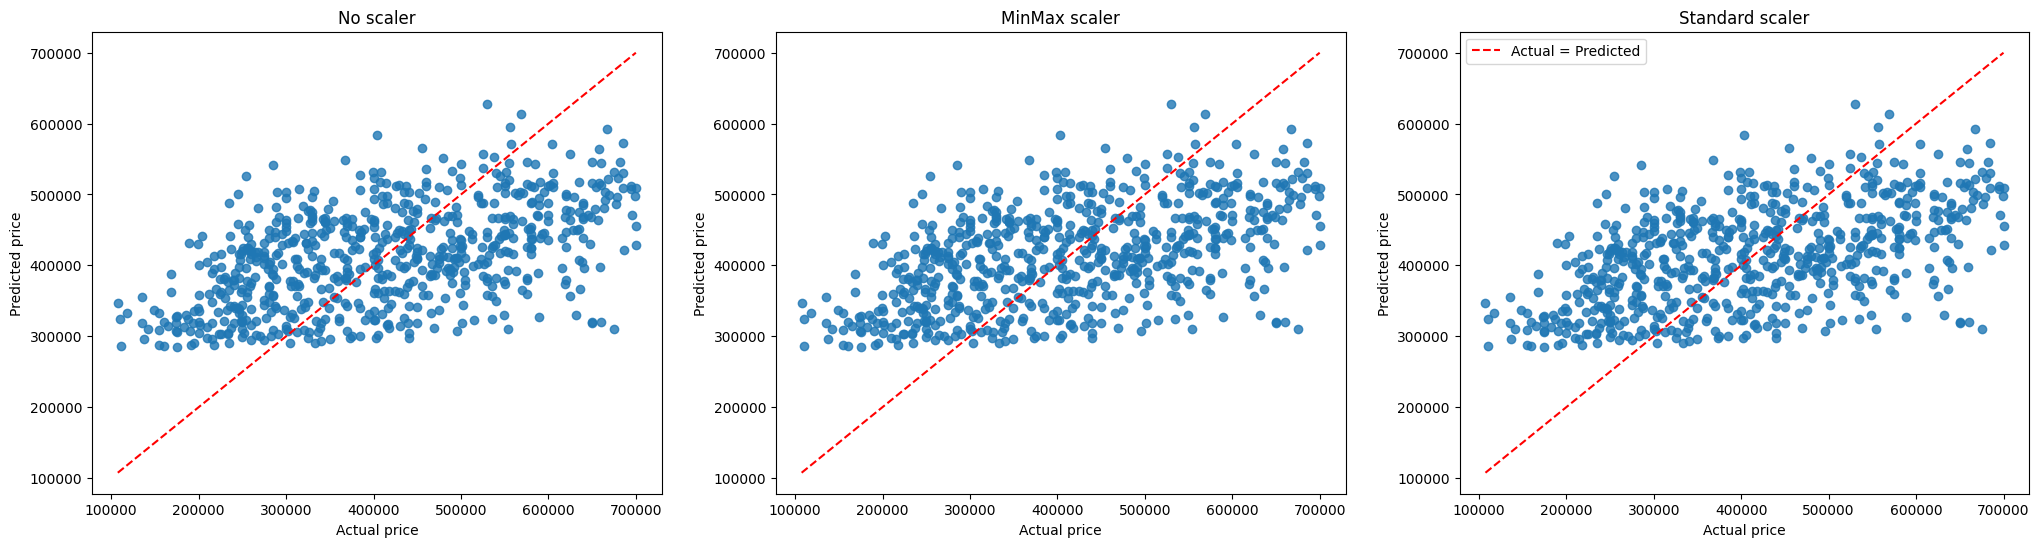

In [503]:
plt.figure(figsize=(25,6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, no_scaler_y_pred, alpha=0.8)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("No scaler")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Actual = Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, mm_scaler_y_pred, alpha=0.8)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("MinMax scaler")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Actual = Predicted")

plt.subplot(1, 3, 3)
plt.scatter(y_test, std_scaler_y_pred, alpha=0.8)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Standard scaler")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Actual = Predicted")

plt.legend()
plt.show()